In [2]:
# Example using nsltc_df, to help make NuSTAR rate lightcurves as pandas dataframe
# 
# 24-Sep-2022 IGH

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

import nsltc_df

import warnings
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 20,'font.family':"sans-serif",\
            'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [4]:
maindir='/Users/iain/data/heasarc_nustar/ns_20210730/'
nsid='90710201001'
clid='06_cl_grade0_sunpos'

In [5]:
# Given maindir, nsid and actual evt id and it should be able to load FPMA, FPMB evt and hk
# This version does no additional filtering and outputs to out file
df_test=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,outfile='test_nsltc.csv')

# No save out
# df_test1=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid)

In [6]:
# Check dataframe looks correct
df_test

,lvta,lvtb,rta,rtb
2021-07-30 18:05:06,0.082479,0.066625,3782.788432,4367.727447
2021-07-30 18:05:07,0.085562,0.064404,3623.096548,4611.515202
2021-07-30 18:05:08,0.075494,0.065271,4079.802283,4351.076676
2021-07-30 18:05:09,0.087469,0.070458,3429.783392,3974.009444
2021-07-30 18:05:10,0.082095,0.059093,3715.223768,4687.559985
...,...,...,...,...
2021-07-30 19:05:33,0.090648,0.078865,3397.755558,3563.052224
2021-07-30 19:05:34,0.094889,0.080540,3224.832938,3687.627782
2021-07-30 19:05:35,0.087371,0.086226,3467.955525,3293.652826
2021-07-30 19:05:36,0.099508,0.085668,3125.362646,3210.068819


In [7]:
# Livetime and rate returned and saved out in default
# Can only return rates via
dfnol=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,lvt=False,outfile='test_nsltc.csv')
dfnol

,rta,rtb
2021-07-30 18:05:06,3782.788432,4367.727447
2021-07-30 18:05:07,3623.096548,4611.515202
2021-07-30 18:05:08,4079.802283,4351.076676
2021-07-30 18:05:09,3429.783392,3974.009444
2021-07-30 18:05:10,3715.223768,4687.559985
...,...,...
2021-07-30 19:05:33,3397.755558,3563.052224
2021-07-30 19:05:34,3224.832938,3687.627782
2021-07-30 19:05:35,3467.955525,3293.652826
2021-07-30 19:05:36,3125.362646,3210.068819


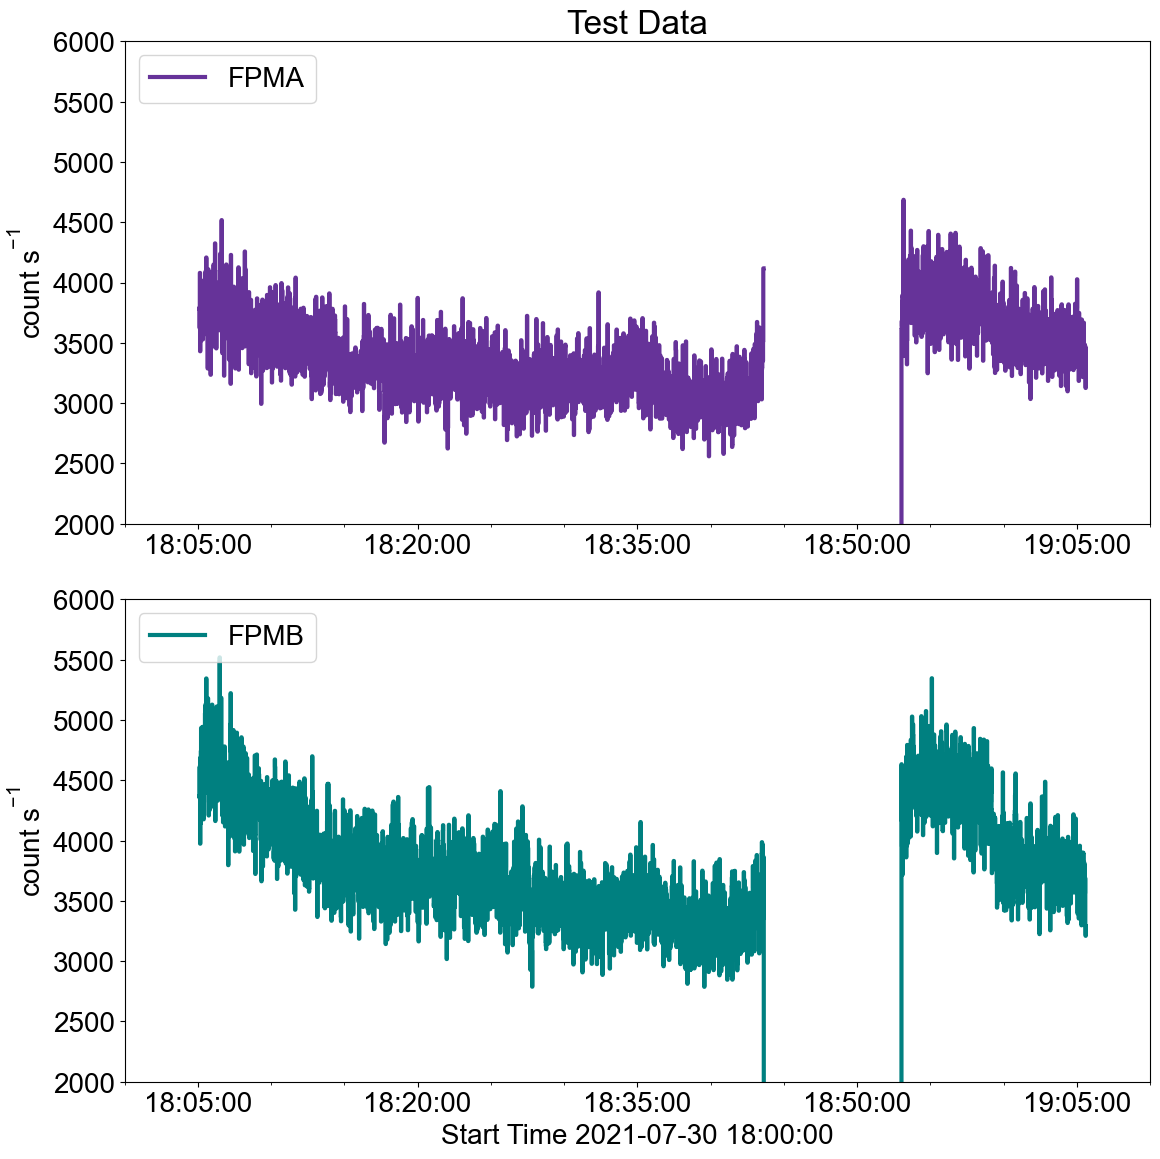

In [8]:
# Control the time axis labelling
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.MinuteLocator(interval=15)
# minorx= matplotlib.dates.SecondLocator(interval=60)
minorx= matplotlib.dates.MinuteLocator(interval=5)

# Control time range of the plot
mint='2021-07-30 18:00:00'
maxt='2021-07-30 19:10:00'
tr=[matplotlib.dates.datestr2num(mint),matplotlib.dates.datestr2num(maxt)]

fig, axs= plt.subplots(2,figsize=(12, 12))
axs[0].plot(df_test.index,df_test["rta"].values,drawstyle='steps-post',lw=3,color='rebeccapurple',label='FPMA')
axs[1].plot(df_test.index,df_test["rtb"].values,drawstyle='steps-post',lw=3,color='teal',label='FPMB')

for ax in axs:
    ax.set_xlabel('Start Time '+mint)
    ax.set_xlim(tr)
    ax.set_ylabel('count s$^{-1}$')
    ax.xaxis.set_major_locator(majorx)
    ax.xaxis.set_minor_locator(minorx)
    ax.xaxis.set_major_formatter(myFmt)
    ax.legend(loc=2)
    ax.set_ylim([2000,6000])
axs[0].set_xlabel('')
axs[0].set_title('Test Data')

fig.tight_layout()
# plt.savefig('example.png')
# plt.close()
plt.show()


In [9]:
# Can load back in csv files created - can be useful if working with lots of files/filtering
# Here loading in the rate only version we saved out
dfin=pd.read_csv('test_nsltc.csv', index_col=0, parse_dates=True)

dfin

,rta,rtb
2021-07-30 18:05:06,3782.788432,4367.727447
2021-07-30 18:05:07,3623.096548,4611.515202
2021-07-30 18:05:08,4079.802283,4351.076676
2021-07-30 18:05:09,3429.783392,3974.009444
2021-07-30 18:05:10,3715.223768,4687.559985
...,...,...
2021-07-30 19:05:33,3397.755558,3563.052224
2021-07-30 19:05:34,3224.832938,3687.627782
2021-07-30 19:05:35,3467.955525,3293.652826
2021-07-30 19:05:36,3125.362646,3210.068819


In [10]:
# As dataframe we can rebin very easily - here doing 10s
# This is combining all data bins (livetimes and rates) using mean function
# If also had a data column in counts called cta then would use sum() instead
# So only mean rta and sum cta would be
# df10p = df_test.resample('10s', level=0).agg({'cta': np.sum, 'rta': np.mean})
# resample can do many fancy things.....
df10 = df_test.resample('10s', level=0).mean()

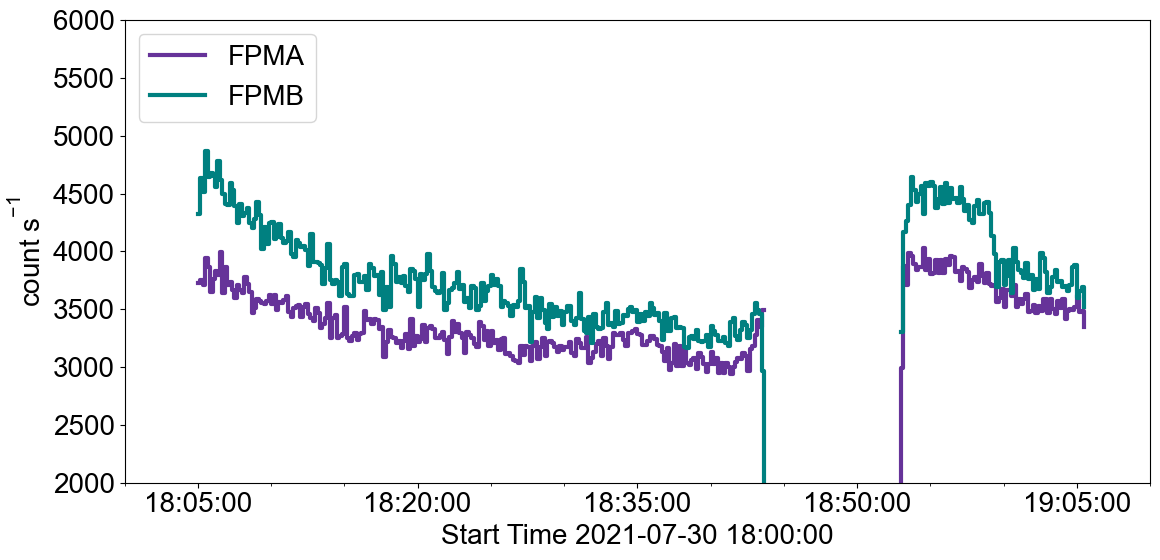

In [11]:
# Plot to check changed
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.MinuteLocator(interval=15)
minorx= matplotlib.dates.MinuteLocator(interval=5)
mint='2021-07-30 18:00:00'
maxt='2021-07-30 19:10:00'
tr=[matplotlib.dates.datestr2num(mint),matplotlib.dates.datestr2num(maxt)]

fig, ax= plt.subplots(1,figsize=(12, 6))
ax.plot(df10.index,df10["rta"].values,drawstyle='steps-post',lw=3,color='rebeccapurple',label='FPMA')
ax.plot(df10.index,df10["rtb"].values,drawstyle='steps-post',lw=3,color='teal',label='FPMB')

ax.set_xlabel('Start Time '+mint)
ax.set_xlim(tr)
ax.set_ylabel('count s$^{-1}$')
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
ax.legend(loc=2)
ax.set_ylim([2000,6000])
fig.tight_layout()
plt.show()


In [12]:
# Can also truncate to chosen time range
dftr=df10.truncate('2021-07-30 18:20:00', '2021-07-30 18:35:00')

# Then easily find average rate over some this time range
print('Mean FPMA: {0:0.2f} count/s'.format(np.mean(dftr["rta"].values)))
print('Mean FPMB: {0:0.2f} count/s'.format(np.mean(dftr["rtb"].values)))

Mean FPMA: 3212.14 count/s
Mean FPMB: 3543.26 count/s


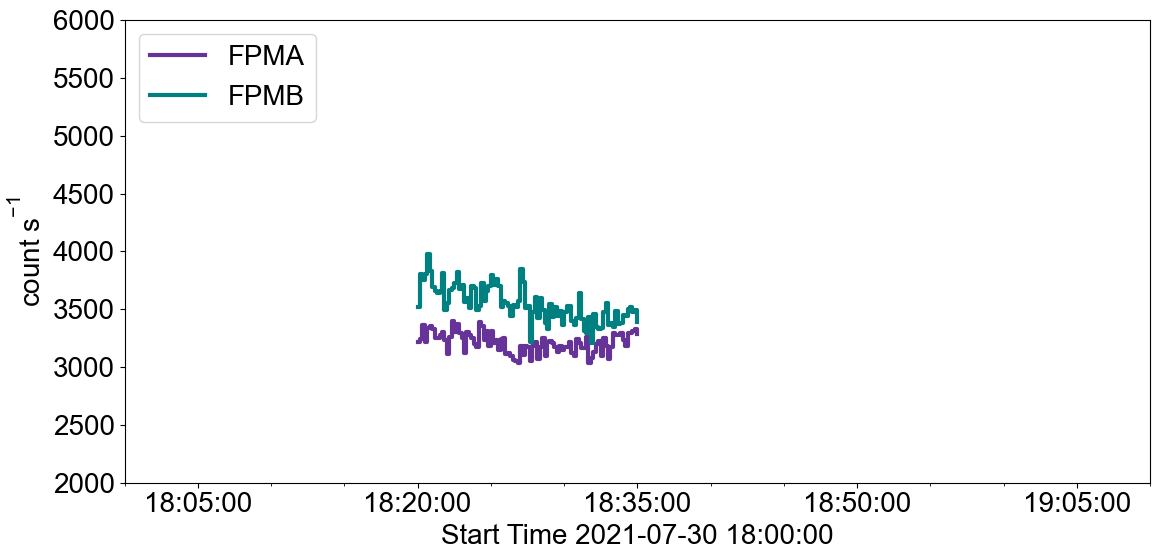

In [13]:
# Plot to check changed
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.MinuteLocator(interval=15)
minorx= matplotlib.dates.MinuteLocator(interval=5)
mint='2021-07-30 18:00:00'
maxt='2021-07-30 19:10:00'
tr=[matplotlib.dates.datestr2num(mint),matplotlib.dates.datestr2num(maxt)]

fig, ax= plt.subplots(1,figsize=(12, 6))
ax.plot(dftr.index,dftr["rta"].values,drawstyle='steps-post',lw=3,color='rebeccapurple',label='FPMA')
ax.plot(dftr.index,dftr["rtb"].values,drawstyle='steps-post',lw=3,color='teal',label='FPMB')

ax.set_xlabel('Start Time '+mint)
ax.set_xlim(tr)
ax.set_ylabel('count s$^{-1}$')
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
ax.legend(loc=2)
ax.set_ylim([2000,6000])
fig.tight_layout()
plt.show()

In [14]:
#  Can filter by energy range
dfe1=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=2,enghigh=3)
dfe2=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=3,enghigh=4)

# Resample as higher energy one will be low/noisy 
dfe130 = dfe1.resample('30s', level=0).mean()
dfe230 = dfe2.resample('30s', level=0).mean()


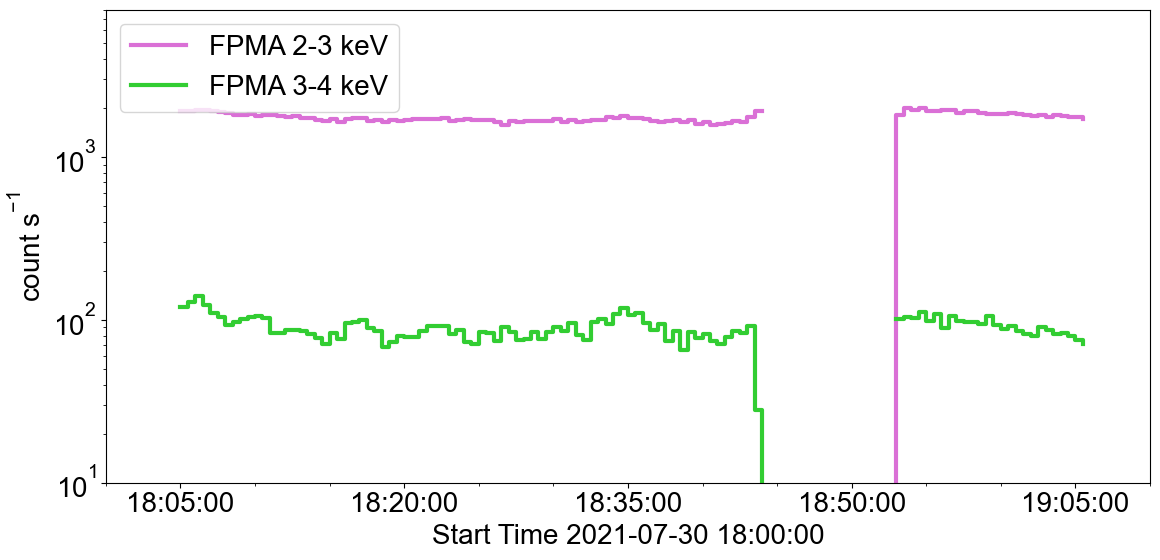

In [15]:
# Just plot for FPMA to check worked
# Plot to check changed
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.MinuteLocator(interval=15)
minorx= matplotlib.dates.MinuteLocator(interval=5)
mint='2021-07-30 18:00:00'
maxt='2021-07-30 19:10:00'
tr=[matplotlib.dates.datestr2num(mint),matplotlib.dates.datestr2num(maxt)]

fig, ax= plt.subplots(1,figsize=(12, 6))
ax.plot(dfe130.index,dfe130["rta"].values,drawstyle='steps-post',lw=3,color='orchid',label='FPMA 2-3 keV')
ax.plot(dfe230.index,dfe230["rtb"].values,drawstyle='steps-post',lw=3,color='limegreen',label='FPMA 3-4 keV')

ax.set_xlabel('Start Time '+mint)
ax.set_xlim(tr)
ax.set_yscale('log')
ax.set_ylabel('count s$^{-1}$')
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
ax.legend(loc=2)
ax.set_ylim([10,8000])
fig.tight_layout()
plt.show()

In [16]:
# If filtering by energy can then also filter by xy in HPC S/C or det_id

# Do the light curve per det_id quadrants
df0=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=2,enghigh=4,det_id=[0])
df1=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=2,enghigh=4,det_id=[1])
df2=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=2,enghigh=4,det_id=[2])
df3=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=2,enghigh=4,det_id=[3])

# print(df0["rta"].values[0],df1["rta"].values[0])

# Resample as could be noisy 
df030 = df0.resample('30s', level=0).mean()
df130 = df1.resample('30s', level=0).mean()
df230 = df2.resample('30s', level=0).mean()
df330 = df3.resample('30s', level=0).mean()

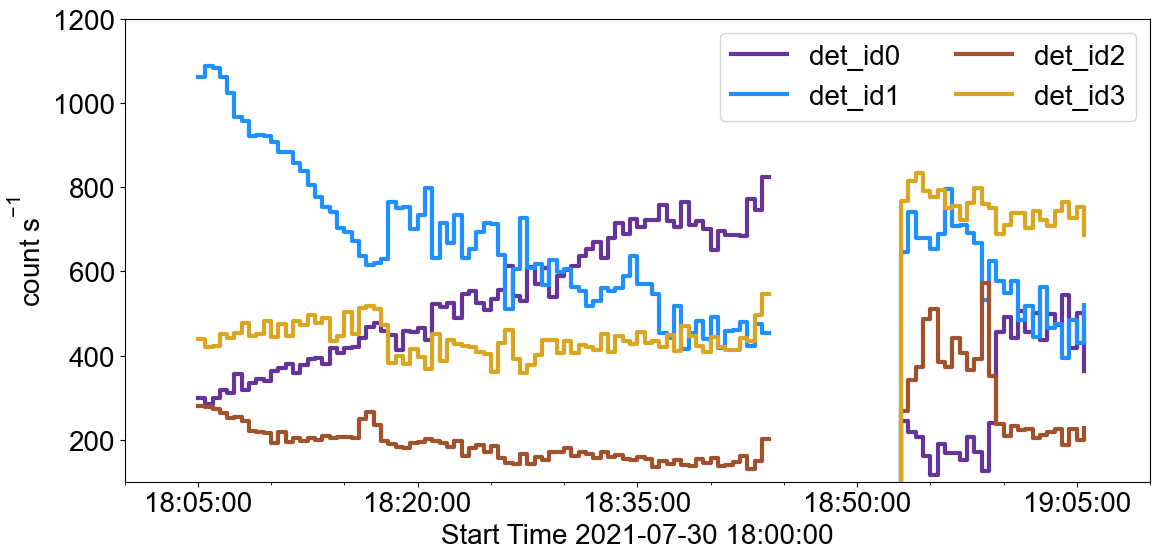

In [17]:
# As an example plot different det_id for FPMA
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.MinuteLocator(interval=15)
minorx= matplotlib.dates.MinuteLocator(interval=5)
mint='2021-07-30 18:00:00'
maxt='2021-07-30 19:10:00'
tr=[matplotlib.dates.datestr2num(mint),matplotlib.dates.datestr2num(maxt)]

fig, ax= plt.subplots(1,figsize=(12, 6))
ax.plot(df030.index,df030["rta"].values,drawstyle='steps-post',lw=3,color='rebeccapurple',label='det_id0')
ax.plot(df130.index,df130["rta"].values,drawstyle='steps-post',lw=3,color='dodgerblue',label='det_id1')
ax.plot(df230.index,df230["rta"].values,drawstyle='steps-post',lw=3,color='sienna',label='det_id2')
ax.plot(df330.index,df330["rta"].values,drawstyle='steps-post',lw=3,color='goldenrod',label='det_id3')

ax.set_xlabel('Start Time '+mint)
ax.set_xlim(tr)
ax.set_ylabel('count s$^{-1}$')
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
ax.legend(loc=1,ncol=2)
ax.set_ylim([100,1200])
fig.tight_layout()
plt.show()

In [18]:
# Finally can make ltc per some region
# Done in HPC S/C in arcesec, and given as [xmin,xmax,ymin,ymax]
bx1=[510*u.arcsec , -370*u.arcsec]
bxy1=[bx1[0].value,bx1[0].value+150,bx1[1].value,bx1[1].value+150]
bx2=[350*u.arcsec , -380*u.arcsec]
bxy2=[bx2[0].value,bx2[0].value+150,bx2[1].value,bx2[1].value+150]

dfxy0=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=2,enghigh=4)
dfxy010 = dfxy0.resample('10s', level=0).mean()

dfxy1=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=2,enghigh=4,xy_range=bxy1)
dfxy110 = dfxy1.resample('10s', level=0).mean()

dfxy2=nsltc_df.nsrate_df(maindir=maindir,nsid=nsid,clid=clid,englow=2,enghigh=4,xy_range=bxy2)
dfxy210 = dfxy2.resample('10s', level=0).mean()
# print(dfxy0["rta"].values[0],dfxy1["rta"].values[0],dfxy2["rta"].values[0])

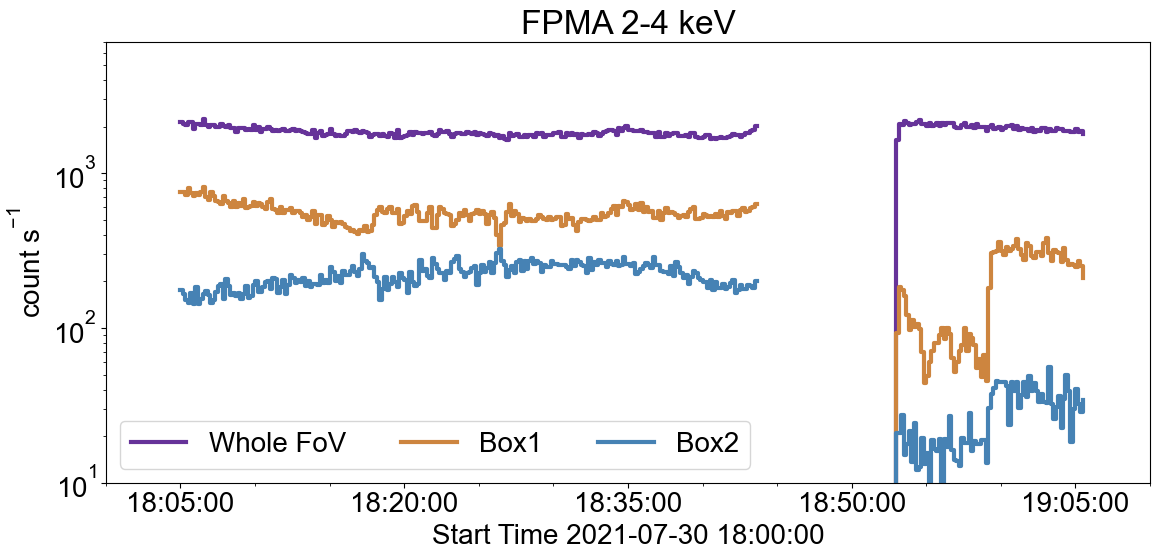

In [19]:
# Now plot the FPMA lightcurve, 2-4 keV over whole FoV, and 2 boxes of interest, with 10s resample
myFmt = matplotlib.dates.DateFormatter('%H:%M:%S')
majorx= matplotlib.dates.MinuteLocator(interval=15)
minorx= matplotlib.dates.MinuteLocator(interval=5)
mint='2021-07-30 18:00:00'
maxt='2021-07-30 19:10:00'
tr=[matplotlib.dates.datestr2num(mint),matplotlib.dates.datestr2num(maxt)]

fig, ax= plt.subplots(1,figsize=(12, 6))
ax.plot(dfxy010.index,dfxy010["rta"].values,drawstyle='steps-post',lw=3,color='rebeccapurple',label='Whole FoV')
ax.plot(dfxy110.index,dfxy110["rta"].values,drawstyle='steps-post',lw=3,color='peru',label='Box1')
ax.plot(dfxy210.index,dfxy210["rta"].values,drawstyle='steps-post',lw=3,color='steelblue',label='Box2')

ax.set_xlabel('Start Time '+mint)
ax.set_xlim(tr)
ax.set_ylabel('count s$^{-1}$')
ax.xaxis.set_major_locator(majorx)
ax.xaxis.set_minor_locator(minorx)
ax.xaxis.set_major_formatter(myFmt)
ax.legend(loc=3,ncol=3)
ax.set_yscale('log')
ax.set_ylim([10,7000])
ax.set_title('FPMA 2-4 keV')
fig.tight_layout()
plt.show()